# 確率分布

確率分布は"データ生成装置"

## データ準備

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler 

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip']/df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 確率分布 (Probability Distribution)

- サイコロの目は全て1/6の確率(uniform distribution: 一様分布)

In [3]:
# random variates(rvs): 確率変量

# lowからhigh-1までのランダムな整数を生成
stats.randint.rvs(1, 7)
stats.randint(1, 7).rvs()

1

In [4]:
# locからloc+scaleまでのランダムな値を生成
stats.uniform(0, 1).rvs()

0.014988305025026238

### 連続型/離散型 確率変数

- 離散型確率分布を表す関数を 確率質量関数 (PMF: Probability mass Function)という
- 連続型確率分布を表す関数を 連続型確率変数 (PDF: Probability Density Function)という

#### 一様分布を描画する PMF

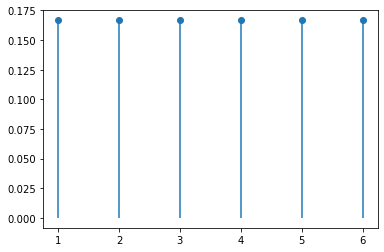

In [5]:
# 離散型 (PMF)
# サイコロの目が 1-6である確率は全て同じ
x = np.arange(1,7)
y = stats.randint(1, 7).pmf(x)
plt.plot(x,y, 'o')
plt.vlines(x, 0, y)

#### 一様分布を描画する PDF

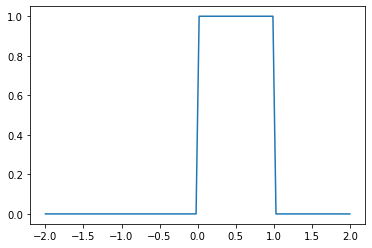

In [6]:
## 連続型 (PDF)
x = np.linspace(-2, 2, 100)
y = stats.uniform(loc=0, scale=1).pdf(x)
plt.plot(x, y)

一様分布(uniform distribution)に従う確率分布であるため、0-1の間のどの値がでる確率も一様である

In [27]:
stats.uniform(loc=0, scale=1).rvs()

0.7404616150072956

確率密度関数が描く面積は確率になる。**面積**が重要。数学的には積分が必要。  
確率密度関数が描く面積は1.  
身長が160cm-170cmである人の確率は20%. 身長がちょうど170cmである人の確率は0%.

### 累積分布関数 (Cumulative Distribution Function)

確率密度関数を負の無限大からある値(x)までをつい上げた値を返す  
その点におけるPDFの左側の面積。  
確率の計算が簡単にできる。  
CDFを描画することで、複数の分布の差異を比較的容易に比較できる　　


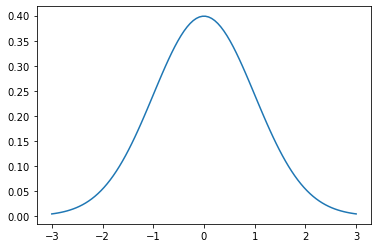

In [32]:
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x)
plt.plot(x, y)

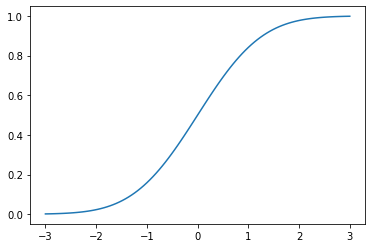

In [34]:
y = stats.norm.cdf(x)
plt.plot(x, y)

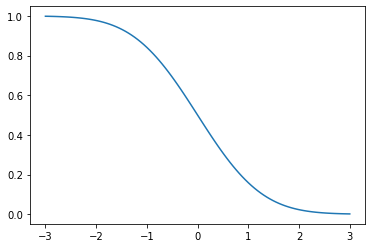

In [37]:
## 右側の面積（sf: survival function = 1-cdf) 
y = stats.norm.sf(x)
plt.plot(x, y)

## 正規分布
分散: $\sigma^2$  
平均: $\mu$. 
$$ N(\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} exp(-\frac{(x-\mu)^2}{2\sigma^2}) $$

In [9]:
# 正規分布から確率変量をランダム１つとってくる
# 大体10付近になる
stats.norm(loc=10, scale=3).rvs()

7.493705751826775

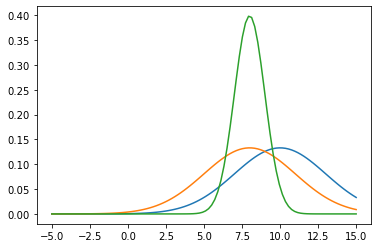

In [11]:
x = np.linspace(-5, 15, 100)
y = stats.norm(loc=10, scale=3).pdf(x)
y2 = stats.norm(loc=8, scale=3).pdf(x)
y3 = stats.norm(loc=8, scale=1).pdf(x)

plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)

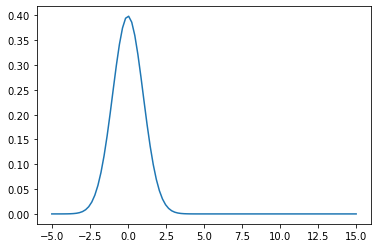

In [44]:
y = stats.norm.pdf(x)
plt.plot(x,y)

## カーネル密度推定　（KDE：Kernel Density Estimation)

簡素奥下分布から確率密度関数（確率分布）を推定する  
それぞれの値にたいする分布（カーネル）を足し合わせて計算する  
実際の業務でも、一旦KDEを作ってからデータセットを生成することは結構多い


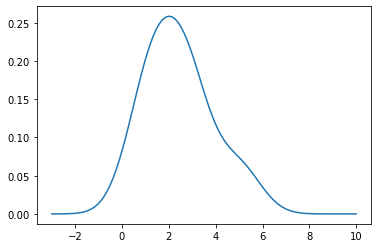

In [50]:
x = np.linspace(-3,10,100)
y = stats.gaussian_kde([1,1,2,2,3,3,5]).pdf(x)
plt.plot(x,y)

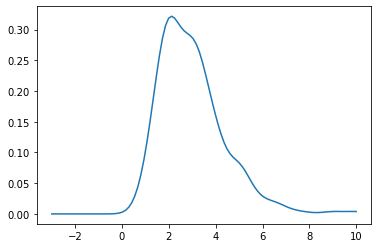

In [51]:
x = np.linspace(-3,10,100)
y = stats.gaussian_kde(df['tip']).pdf(x)
plt.plot(x,y)

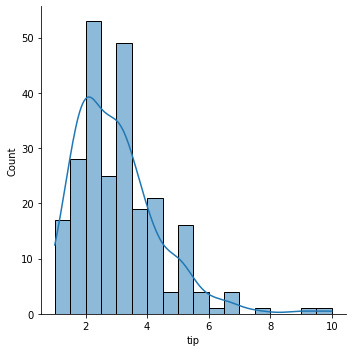

In [52]:
sns.displot(df['tip'], kde=True)

df['tip']の背後にある母集団の分布を確率分布から見ることができる  
それぞれのデータポイントにカーネルを作るので、データの境界を超えてデータを取ってしまうことがある。  
データの上限、下限がある場合は注意。

In [55]:
resample_data = stats.gaussian_kde(df['tip']).resample()
# resample_data

境界線がある場合は、ミラーリングさせる。  
2 * (bound - data) を計算すればOK (境界をこえたものを、その絶対値分、足し合わせる）

## 68-95-99ルール

平均4, 標準偏差3の正規分布からなるランダムな値を取得する

In [13]:
# x = np.linspace(-6, 14, 1000)
#y = stats.norm(loc=4, scale=3).pdf(x)


group1 = []
group2 = []
group3 = []
samples = []

loc = 4
scale = 3

for _ in range(1000):
    sample = stats.norm(loc=loc, scale=scale).rvs()
    if loc-scale < sample < loc+scale:
        group1.append(sample)        
    if loc-scale*2 < sample < loc+scale*2:
        group2.append(sample)
    if loc-scale*3 < sample < loc+scale*3:
        group3.append(sample)
    samples.append(sample)

print(len(group1)/len(samples))
print(len(group2)/len(samples))
print(len(group3)/len(samples))

0.678
0.952
0.996


## 標準化

平均を0、標準偏差を1にするために、各値から平均を引き、標準偏差で割る

## 偏差値

平均を50、標準偏差を10にすること（T-score）

- 50+-10: 約2/3 (60以上は上位16%)
- 50+-20: 約95%
- 50+-30: 約99%

## 標準正規分布 (standard normal distribution)

平均0, 分散1の正規分布（正規分布を標準化したもの）

- +-1: 約68%
- +-2: 約95%
- +-3: 約99%


In [15]:
scaler = StandardScaler()

# fit_Transformは２次元データを受け付ける
scaler.fit_transform([[1,30],[2,20],[3,40],[4,10]])

array([[-1.34164079,  0.4472136 ],
       [-0.4472136 , -0.4472136 ],
       [ 0.4472136 ,  1.34164079],
       [ 1.34164079, -1.34164079]])

In [16]:
# tip_rateを２次元配列化
# df['tip_rate'].values.reshape(244, 1)
# index: -1は最終項目のインデックスなので、以下でも書ける
# df['tip_rate'].values.reshape(-1, 1)

scaled = scaler.fit_transform(df['tip_rate'].values.reshape(-1, 1))

# 2つ以上の項目がある場合
scaled = scaler.fit_transform(df[['total_bill', 'tip_rate']])

# 偏差値化
scaled*10+50


array([[ 46.85288695,  33.36981828],
       [ 39.36764687,  49.95717657],
       [ 51.377799  ,  50.94914672],
       [ 54.38315103,  46.5507406 ],
       [ 55.40744704,  47.70375032],
       [ 56.19536705,  54.17363756],
       [ 37.60045485,  61.03379478],
       [ 57.98507107,  42.66063856],
       [ 44.65796693,  44.99836433],
       [ 44.36531092,  59.47315739],
       [ 39.28885487,  50.93553526],
       [ 67.41759917,  46.88272423],
       [ 45.08569493,  40.3216191 ],
       [ 48.47375097,  50.32413406],
       [ 44.42159092,  57.02885077],
       [ 52.01939101,  53.42053237],
       [ 39.35639087,  50.14151189],
       [ 46.06496694,  60.98406513],
       [ 46.83037495,  57.45627991],
       [ 50.97258299,  50.23381346],
       [ 47.89969496,  60.97282376],
       [ 50.56736699,  45.85412481],
       [ 45.47965493,  46.81774845],
       [ 72.10009523,  55.16606793],
       [ 50.03833498,  49.94116426],
       [ 47.77587896,  45.17355156],
       [ 42.7782149 ,  48.16004664],
 

## 二項分布 (Binomial Distribution)

ある観察や試行を複数回行った際に、ある事象が起こる回数が従う確率分布

例: 2がn回中、x回出る組み合わせは、$nCk = \frac{n!}{x!(n-x)!}$    
ある事象が起こる確率pの思考をn回実施して、その事象がx回起こる確率P(x)は  

$ P(x) = nCxp^x q^{n-x} = \frac{n!}{x!(n-x)!}p^x q^{n-x} $  ただしq = 1-p

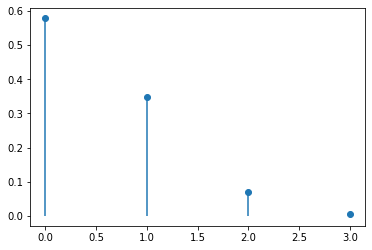

In [17]:
n = 3
x = np.arange(n+1)
y = stats.binom(n=3, p=1/6).pmf(x)
plt.plot(x,y, 'o')
# 0からyまでの縦線
plt.vlines(x, 0, y)

### 二項分布と正規分布

- 二項分布のnを無限大にした分布は正規分布に類似する
  - 平均np, 分散npqの正規分布に近似できる

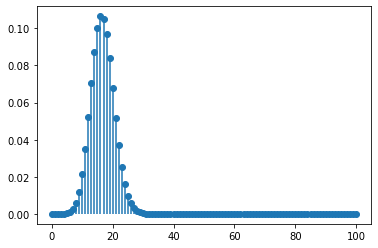

In [30]:
n = 100
p = 1/6
x = np.arange(n+1)
y = stats.binom(n=n, p=p).pmf(x)
plt.plot(x,y, 'o')
# 0からyまでの縦線
plt.vlines(x, 0, y)

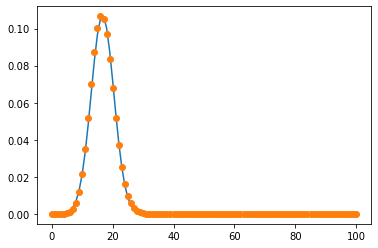

In [33]:
y2 = stats.norm(n*p, np.sqrt(n*p*(1-p))).pdf(x)
plt.plot(x,y2)
plt.plot(x,y,'o')

In [23]:
n*p

16.666666666666664

In [24]:
stats.binom(n,p).var()

13.888888888888888

In [25]:
n*p*(1-p)

13.888888888888888

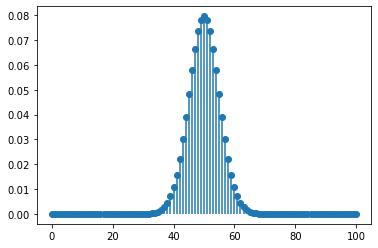

In [20]:
n = 100
x = np.arange(n+1)
y = stats.binom(n=100, p=1/2).pmf(x)
plt.plot(x,y, 'o')
# 0からyまでの縦線
plt.vlines(x, 0, y)